In [1]:
import pandas as pd
import math
import scipy.stats as st
import PIL.Image as pilimg

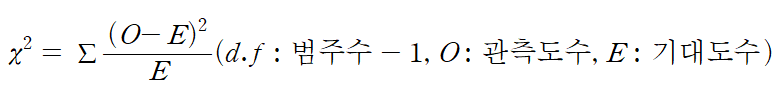

In [2]:
# 적합도 검정(test for goodness of fit) - 카이제곱
# 어떤 도수분포가 특정한 패턴을 따르는가를 검정하고자 할 때 사용한다.
# 귀무가설 H0 : 소비자들의 과일음료 선호도에는 차이가 없다.
# 귀무가설 H1 : 소비자들의 과일음료 선호도에는 차이가 있다.

# 카이제곱 적합도 검정을 위한 가정
# 1. 자료는 임의의 표본이어야 한다.
# 2. 각 범주에 기대도수는 5 이상이어야 한다.

# 카이제곱 적합도 검정은 변수들이 정규분포를 따르는지 판단할 때도 이용한다.

formula = pilimg.open("C:\\Users\\Msi\\Desktop\\통계 프로그래밍 연습\\적합도 검정 공식.png")
formula

In [3]:
data = {"관측도수" : [32, 28, 16, 14, 10], "기대도수" : [20, 20, 20, 20, 20]}
index = ["cherry", "strawberry", "orange", "lime", "grape"]
df = pd.DataFrame(data, index = index)
 

data = {"관측도수" : [122, 85, 76, 17], "기대도수" : [114, 96, 69, 21]}
df2 = pd.DataFrame(data)

In [4]:
def chi_square_cv(df, n, alpha, side_type):
    X_square = 0
    for i, j in zip(df["관측도수"], df["기대도수"]):
        X_square = X_square + math.pow(i - j, 2) / j
    if side_type == 'left':
        cv = st.chi2.ppf(alpha, n-1)
        if X_square <= cv:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 귀무가설을 기각한다.".format(X_square, cv))
        else:
            print("검정값 {:.3f}이 임계값 {:.3f} 밖에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv))
    elif side_type == 'right':
        cv = st.chi2.ppf(1-alpha, n-1)
        if cv <= X_square:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 귀무가설을 기각한다.".format(X_square, cv))
        else:
            print("검정값 {:.3f}이 임계값 {:.3f} 밖에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv))
    elif side_type == 'both':
        cv_left = st.chi2.ppf(alpha/2, n-1)
        cv_right = st.chi2.ppf(1-(alpha/2), n-1)
        if X_square <= cv_left:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 때문에 귀무가설을 기각한다.".format(X_square, cv_left))
        elif cv_right <= X_square:
            print("검정값 {:.3f}이 임계값 {:.3f} 안에 포함되기 때문에 때문에 귀무가설을 기각한다.".format(X_square, cv_right))
        else:
            print("검정값 {:.3f}이 임계값 {:.3f}와 임계값 {:.3f} 사이에 있기 때문에 귀무가설을 기각하지 않는다.".format(X_square, cv_left, cv_right))
    else:
        print("side_type을 left, right, both 중에 골라주세요.")    

In [5]:
chi_square_cv(df, 5, 0.05, 'right')

검정값 18.000이 임계값 9.488 안에 포함되기 때문에 귀무가설을 기각한다.


In [6]:
chi_square_cv(df2, 4, 0.1, 'right')

검정값 3.294이 임계값 6.251 밖에 있기 때문에 귀무가설을 기각하지 않는다.
